In [13]:
import os,sys
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# sys.path.insert(
#     0,
#     '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/script/spatial_pipeline/lib/utils/'
# )
# from spatial.utils import getDefaultColors, removeBiasGenes, getDEG

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=12,vector_friendly=True,figsize=(4,4))
sc.settings.verbosity = 3

In [3]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/filtered_data/merged_adata4.h5ad')

In [68]:
adata = sc.read(
    "/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/2.1_merge_big_cell_community/all_merged_adata.h5ad"
)

In [69]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [64]:
adata = adata[adata.obs["celltype"] == "Fibroblast_Cell", :]

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [65]:
adata.obs["celltype"].value_counts()

celltype
Fibroblast_Cell    16456
Name: count, dtype: int64

In [70]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/9.11_CXCL12_CAF_DEGs'
os.makedirs(od,exist_ok=True)
os.chdir(od)

In [75]:
sorted_celltypes = sorted(adata.obs["region"].cat.categories)
adata.obs["region"] = adata.obs["region"].astype(pd.CategoricalDtype(categories=sorted_celltypes, ordered=True))

In [76]:
gene_expression = sc.get.obs_df(adata,keys = ['CXCL12'],use_raw=False)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


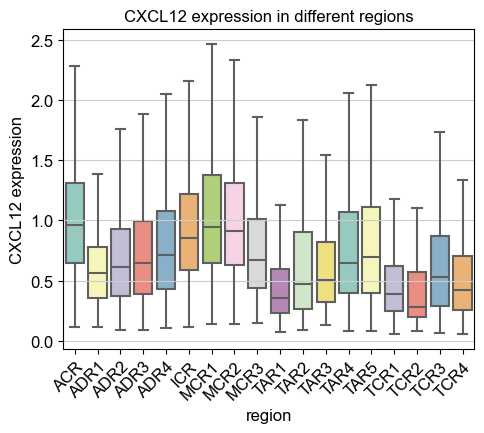

In [80]:
import seaborn as sns

gene_expression["region"] = adata.obs["region"]
# remove expr = 0
gene_expression = gene_expression[gene_expression["CXCL12"] > 0]
# plot boxplot for each region
fig, ax = plt.subplots(figsize=(5, 4.5))
sns.boxplot(data=gene_expression, x="region", y="CXCL12", palette="Set3", showfliers=False, ax=ax)
ax.set_xticklabels(gene_expression["region"].cat.categories, rotation=45, ha="right", rotation_mode="anchor")
ax.set_xlabel("region")
ax.set_ylabel("CXCL12 expression")
ax.set_title("CXCL12 expression in different regions")
plt.savefig("CXCL12_expression_in_different_regions.pdf", bbox_inches="tight")

In [50]:
gene_expression

,CXCL12,region
33098-SS200000118TL_C1,0.0,TAR2
2194-SS200000118TL_C1,0.0,TAR3
119011-SS200000118TL_C1,0.0,TCR1
62261-SS200000118TL_C1,0.0,TCR2
118257-SS200000118TL_C1,0.0,MCR3
...,...,...
229112-SS200000495BR_B5,0.0,ADR2
42504-SS200000495BR_B5,0.0,MCR2
81909-SS200000495BR_B5,0.0,MCR1
223046-SS200000495BR_B5,0.0,ICR


In [47]:
gene_expression

,CXCL12,region
33098-SS200000118TL_C1,0.0,TAR2
2194-SS200000118TL_C1,0.0,TAR3
119011-SS200000118TL_C1,0.0,TCR1
62261-SS200000118TL_C1,0.0,TCR2
118257-SS200000118TL_C1,0.0,MCR3
...,...,...
229112-SS200000495BR_B5,0.0,ADR2
42504-SS200000495BR_B5,0.0,MCR2
81909-SS200000495BR_B5,0.0,MCR1
223046-SS200000495BR_B5,0.0,ICR


In [ ]:
gene_expression

In [11]:
gene_df

,CXCL12,IFNGR1
R492_CELL1093_N1,0.000000,0.000000
R492_CELL81_N4,0.000000,0.217734
R492_CELL11_N2,0.000000,0.000000
R492_CELL1188_N1,0.000000,0.000000
R492_CELL1402_N1,0.000000,0.000000
...,...,...
R1326_CELL4845_N1,1.598497,0.000000
R1326_CELL4346_N1,1.446540,0.000000
R1326_CELL4621_N1,0.000000,0.000000
R1326_CELL5177_N1,2.016987,0.000000


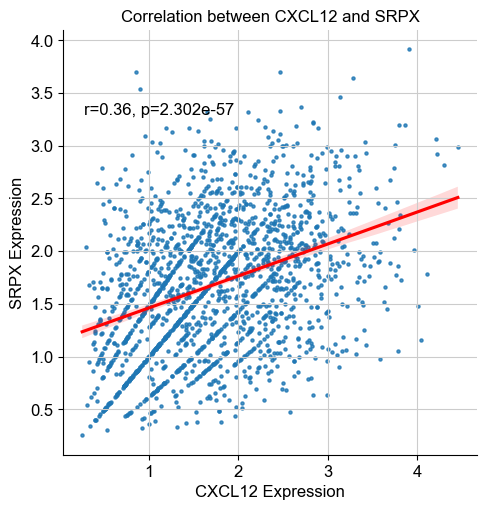

In [29]:
# sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=12,vector_friendly=True,figsize=(4,4))
# sc.pl.violin(adata,keys=['CXCL12','SRPX','LAMB1','C3','C1QA'],groupby='cellsubtype',rotation=90,use_raw=False,stripplot=False,save='CXCL12_violin.pdf')
# sc.pl.umap(adata,color=['CXCL12','SRPX','LAMB1','C3','C1QA'],use_raw=False,save='CXCL12_umap.pdf')
# plot correlation line between CXCL12 and SRPX
# Extract the expression levels of the two genes

gene_df = sc.get.obs_df(adata,keys = ['CXCL12','SRPX'],use_raw=False)
# selcet all expr >0 cells
gene_df = gene_df[(gene_df['CXCL12']>0)&(gene_df['SRPX']>0)]
# Calculate and plot the regression line
import seaborn as sns
import scipy as sp
g = sns.lmplot(x='CXCL12', y='SRPX', data=gene_df, scatter_kws={'s': 5},line_kws={'color': 'red'})

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['CXCL12'], data['SRPX'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.4g}'.format(r, p),
            transform=ax.transAxes)
g.map_dataframe(annotate)
plt.xlabel('CXCL12 Expression')
plt.ylabel('SRPX Expression')
plt.title('Correlation between CXCL12 and SRPX')
plt.savefig('CXCL12_SRPX_regression.pdf')  # You can choose your preferred file format
plt.show()



In [51]:
sp.stats.spearmanr(gene_df['CXCL12'], gene_df['SRPX'])

SignificanceResult(statistic=0.3534935647833488, pvalue=2.468482530197449e-164)

In [55]:
ICPs = ['LAG3', 'CTLA4', 'ICOS', 'TIGIT', 'ICOSLG', 'CD274', 'HAVCR2']

# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
sc.pl.stacked_violin(adata, ICPs, groupby='cellsubtype', standard_scale='var', save=f'ICPs_region.pdf', cmap='viridis_r',show=False, use_raw=False, swap_axes=True)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


{'mainplot_ax': <AxesSubplot: >,
 'color_legend_ax': <AxesSubplot: title={'center': 'Median expression\nin group'}>}

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


meta NOT subset; don't know how to subset; dropped
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


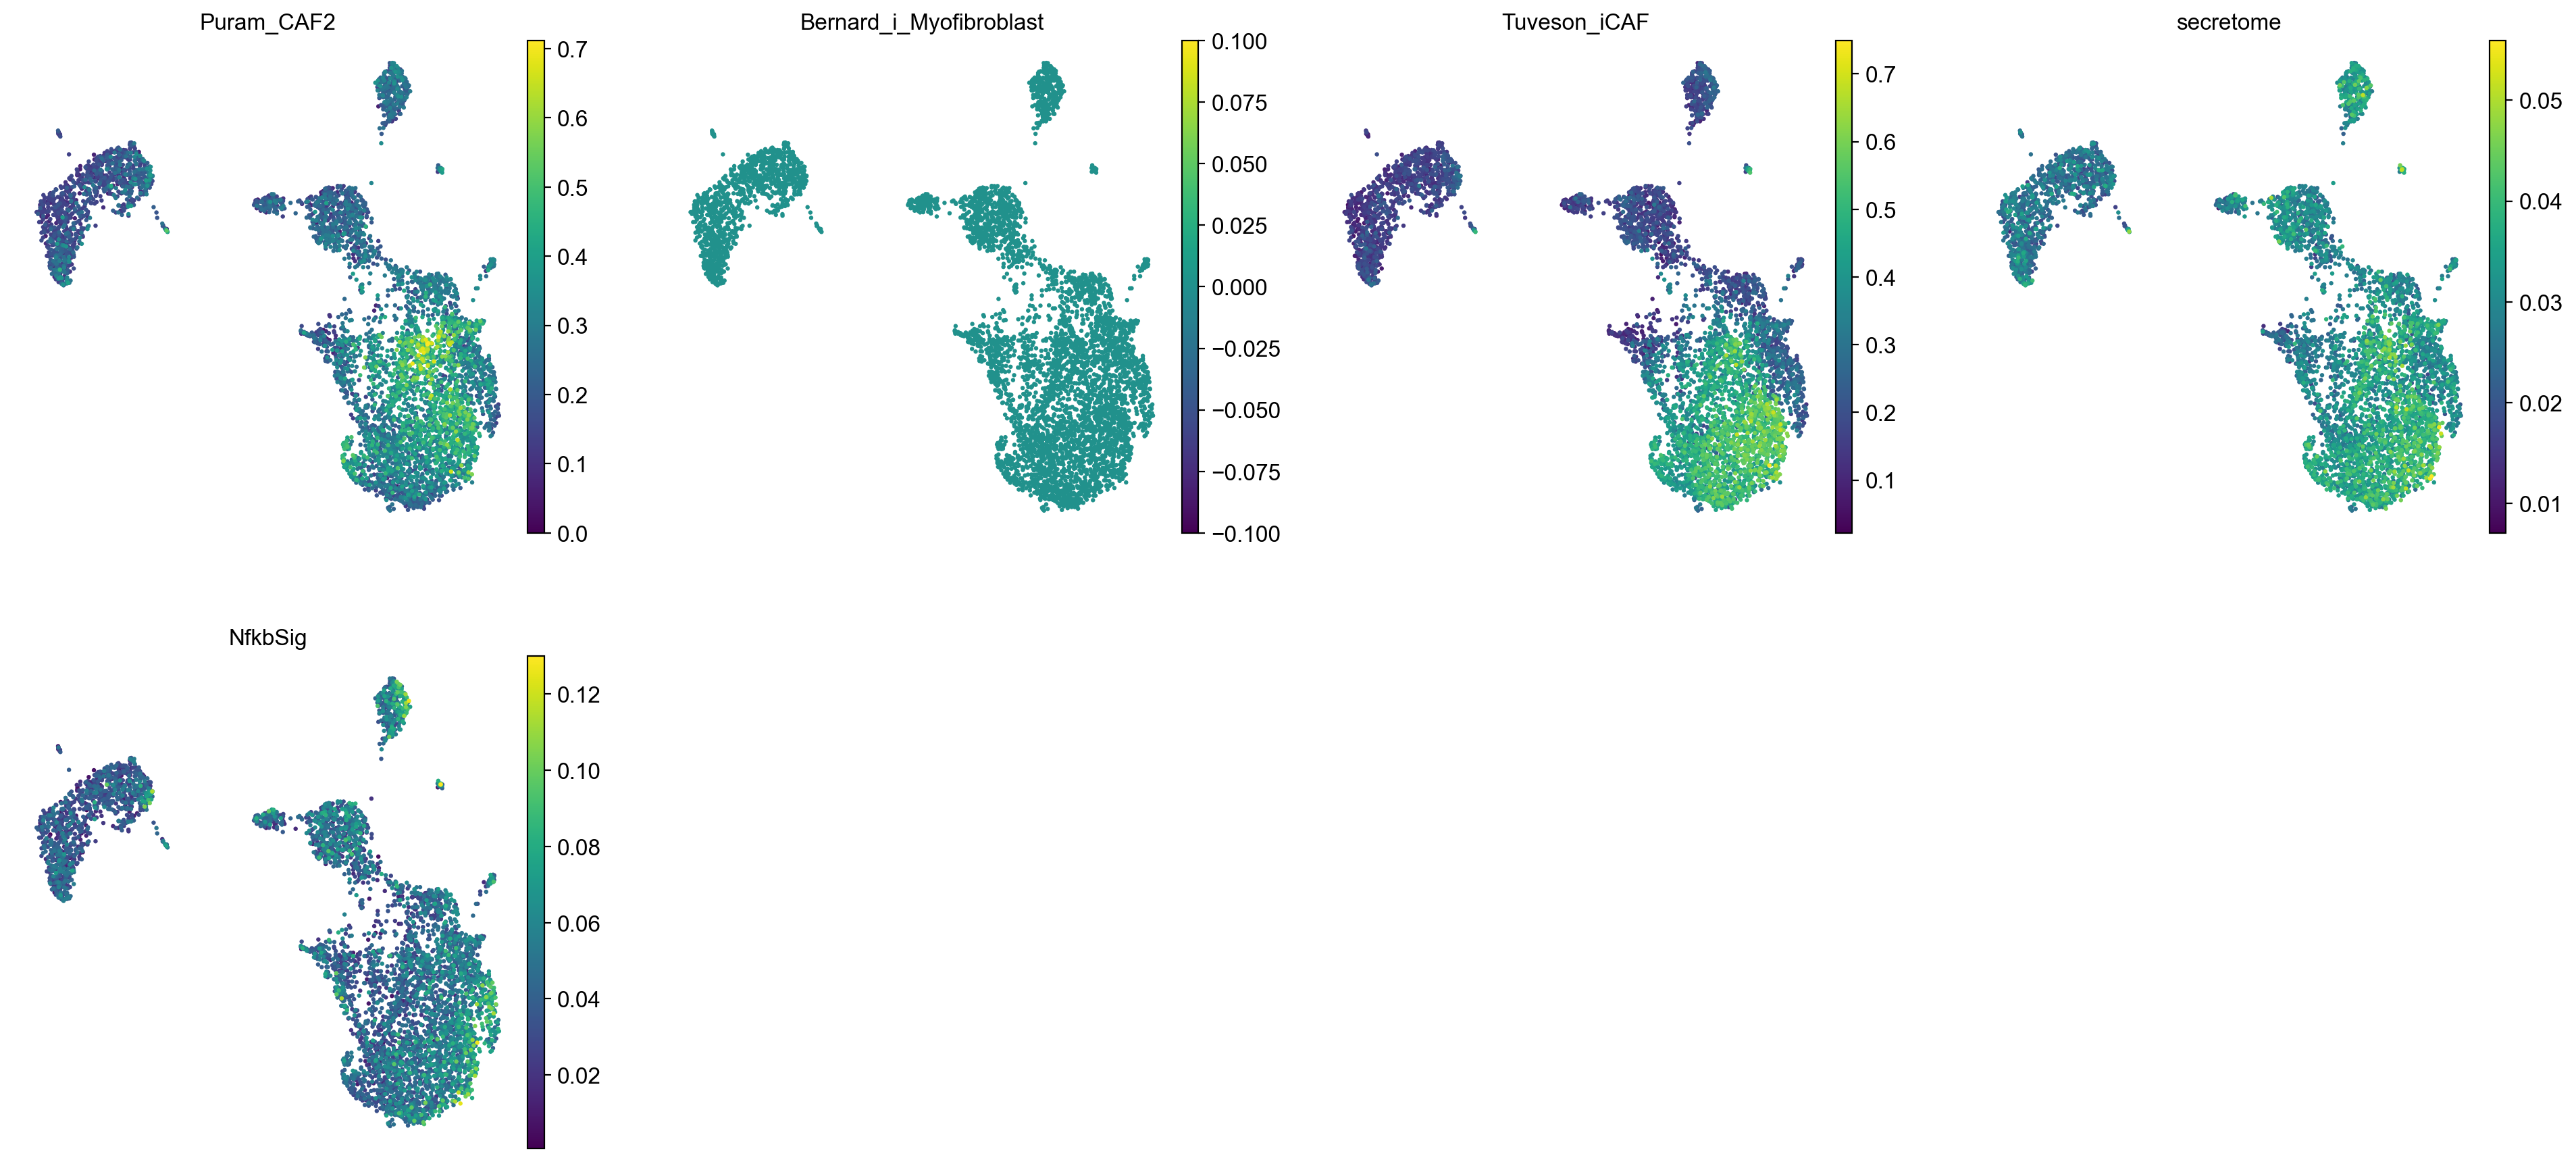

In [30]:
from ctxcore.genesig import GeneSignature

sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
T_signature_list = ['secretome','NfkbSig','Puram_CAF2','Bernard_i_Myofibroblast','Tuveson_iCAF']
sig_T = []
for i in sig:
    if i.name in T_signature_list:
        sig_T.append(i)
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx = aucell(exp_mtx, sig_T, noweights=True, num_workers=20)
all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc.pl.violin(adata, keys=auc_mtx.columns,groupby='cellsubtype', wspace=0.4, show=False, rotation=45,stripplot=False,save="CXCL12_signature_score.pdf")
sc.pl.umap(adata,color=auc_mtx.columns,use_raw=False,save='CXCL12_signature_umap.pdf')

In [31]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/2.1_merge_big_cell_community/all_merged_adata.h5ad')
region_map = {
    "Tumor_Cell_region_1": 'TCR1',
    'Tumor_Cell_region_2': 'TCR2',
    'Tumor_Cell_region_3': 'TCR3',
    'Tumor_Cell_region_4': 'TCR4',
    'Tumor_around_region_1': 'TAR1',
    'Tumor_around_region_2': 'TAR2',
    'Tumor_around_region_3': 'TAR3',
    'Tumor_around_region_4': 'TAR4',
    'Tumor_around_region_5': 'TAR5',
    'Mesenchymal_Cell_region_1': 'MCR1',
    'Mesenchymal_Cell_region_2': 'MCR2',
    'Mesenchymal_Cell_region_3': 'MCR3',
    'ADM_region_1': 'ADR1',
    'ADM_region_2': 'ADR2',
    'ADM_region_3': 'ADR3',
    'ADM_region_4': 'ADR4',
    'Acinar_Cell_region':'ACR',
    'Immune_Cell_region':'ICR',
}
adata.obs['region'] = adata.obs['community_type'].map(region_map)
adata.obs['region'] = pd.Categorical(adata.obs['region'], categories=sorted(adata.obs['region'].unique()))

In [33]:
adata = adata[adata.obs['celltype']=='Fibroblast_Cell',:]

In [22]:
# from ctxcore.genesig import GeneSignature

# sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/9.11_CXCL12_CAF_DEGs/CXCL12_CAF.gmt')
# from pyscenic.aucell import aucell
# exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
# auc_mtx = aucell(exp_mtx, sig, noweights=True, num_workers=20)
# all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
# adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
# auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
# adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)
# sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc.pl.violin(adata, keys=auc_mtx.columns,groupby='region', wspace=0.4, show=False, rotation=45,stripplot=False,save="_NMF5_score.pdf")

/tmp/ipykernel_1743/1599573978.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['region'] = pd.Categorical(adata.obs['region'], categories=sorted(adata.obs['region'].unique()))


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


<Axes: ylabel='CAF_CXCL12'>

In [34]:
from ctxcore.genesig import GeneSignature

sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/signature.gmt')
T_signature_list = ['secretome','NfkbSig','Puram_CAF2','Bernard_i_Myofibroblast','Tuveson_iCAF']
sig_T = []
for i in sig:
    if i.name in T_signature_list:
        sig_T.append(i)
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx = aucell(exp_mtx, sig_T, noweights=True, num_workers=20)
all_zero_columns = auc_mtx.columns[auc_mtx.eq(0).all()]
adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)
auc_mtx_filtered = auc_mtx.drop(columns=all_zero_columns, inplace=False)
adata.obs[auc_mtx_filtered.columns] = auc_mtx_filtered.fillna(0)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(5,5))
sc.pl.violin(adata, keys=auc_mtx.columns,groupby='region', wspace=0.4, show=False, rotation=45,stripplot=False,save="_CXCL12_score.pdf")

Less than 80% of the genes in Bernard_i_Myofibroblast are present in the expression matrix.
Less than 80% of the genes in secretome are present in the expression matrix.
/tmp/ipykernel_1743/3305506362.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[auc_mtx.columns] = auc_mtx.fillna(0)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped


[<Axes: ylabel='Puram_CAF2'>,
 <Axes: ylabel='Bernard_i_Myofibroblast'>,
 <Axes: ylabel='Tuveson_iCAF'>,
 <Axes: ylabel='secretome'>,
 <Axes: ylabel='NfkbSig'>]